In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [2]:
df1= pd.read_csv('../data/processed/version1_processed_dataset_encoded.csv')
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,PaperlessBilling_Yes,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year
0,0,1,29.85,29.85,0,False,False,False,False,True,...,True,False,False,True,False,False,False,False,False,False
1,0,34,56.95,1889.50,0,True,False,False,False,False,...,False,False,True,False,True,False,False,False,True,False
2,0,2,53.85,108.15,1,True,False,False,False,False,...,True,False,True,True,False,False,False,False,False,False
3,0,45,42.30,1840.75,0,True,False,False,False,False,...,False,False,True,False,True,True,False,False,True,False
4,0,2,70.70,151.65,1,False,True,False,False,True,...,True,False,False,False,False,False,False,False,False,False


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   Churn                                  7043 non-null   int64  
 5   gender_Male                            7043 non-null   bool   
 6   InternetService_Fiber optic            7043 non-null   bool   
 7   InternetService_No                     7043 non-null   bool   
 8   PaymentMethod_Credit card (automatic)  7043 non-null   bool   
 9   PaymentMethod_Electronic check         7043 non-null   bool   
 10  PaymentMethod_Mailed check             7043 non-null   bool   
 11  Part

#### Feature engineering

Binning 'tenure' feature into 6 ranges

In [5]:
df1['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [6]:
condition = [((df1.tenure >= 0)&(df1.tenure <= 12)), ((df1.tenure > 12)&(df1.tenure <= 24)), 
             ((df1.tenure > 24)&(df1.tenure <= 36)),((df1.tenure > 36)&(df1.tenure <= 48)),
             ((df1.tenure > 48)&(df1.tenure <= 60)), (df1.tenure > 60)]

#choice = ['0-1year','1-2years', '2-3years', '3-4years','4-5years','more than 5 years']
choice = [0,1, 2, 3, 4, 5]
df1['tenure_range'] = np.select(condition, choice)

In [8]:
df1['tenure_range'].value_counts()

tenure_range
0    2186
5    1407
1    1024
2     832
4     832
3     762
Name: count, dtype: int64

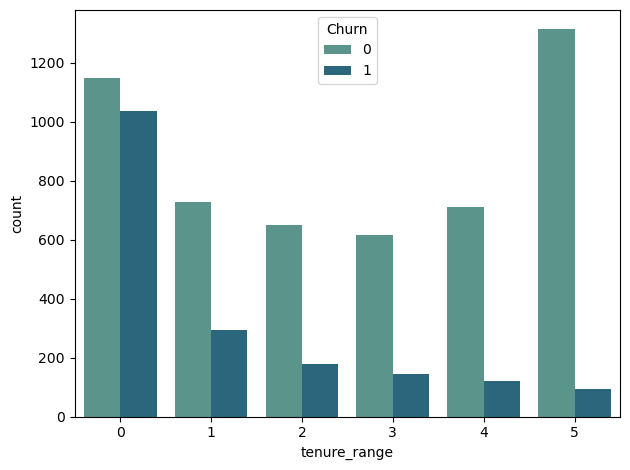

In [9]:
_ = sns.countplot(x= 'tenure_range', hue='Churn', data=df1, palette='crest', order=choice)
plt.tight_layout()

We can notice that customers who stay longer are more loyal to the company and very small number who leave after staying more than 4 years. On the other hand, customers churn rate is very high during the first year.

### Feature Scaling

Log transform

In [11]:
df1['MonthlyCharges']=np.log1p(df1['MonthlyCharges'])
df1['TotalCharges']=np.log1p(df1['TotalCharges'])

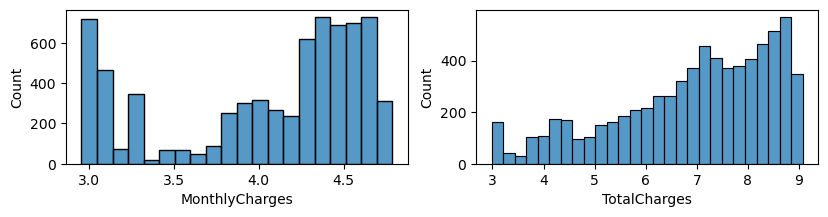

In [12]:
plt.figure(figsize=(15,2))
plt.subplot(1, 3, 2)
_ = sns.histplot(x='MonthlyCharges', data=df1)

plt.subplot(1, 3, 3)
_ = sns.histplot(x='TotalCharges', data=df1)

In [13]:
df1.to_csv('../data/processed/version2_processed_dataset_featureeng_featurescaling.csv', index=False)  # adjust path if needed

In [5]:
df2= pd.read_csv('../data/processed/version2_processed_dataset_featureeng_featurescaling.csv')

In [7]:
print('Before Log Transformation')
print(df1['TotalCharges'].describe())
print('\n')
print('After Log Transformation')
print(df2['TotalCharges'].describe())

Before Log Transformation
count    7043.000000
mean     2283.300441
std      2265.000258
min        18.800000
25%       402.225000
50%      1400.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64


After Log Transformation
count    7043.000000
mean        6.944622
std         1.545545
min         2.985682
25%         5.999494
50%         7.245334
75%         8.239488
max         9.069445
Name: TotalCharges, dtype: float64


In [8]:
print('Before Log Transformation')
print(df1['MonthlyCharges'].describe())
print('\n')
print('After Log Transformation')
print(df2['MonthlyCharges'].describe())

Before Log Transformation
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64


After Log Transformation
count    7043.000000
mean        4.043347
std         0.580288
min         2.957511
25%         3.597312
50%         4.267597
75%         4.509210
max         4.785406
Name: MonthlyCharges, dtype: float64
